In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
commodities = quandl.get("UCOM/ALLC_AUS", authtoken="w-mFq_xX3zLtSzvHM8vx")

In [12]:
commodities.head()

,ALL COMMODITIES - Import - Trade (USD),ALL COMMODITIES - Import - Weight (Kg),ALL COMMODITIES - Export - Trade (USD),ALL COMMODITIES - Export - Weight (Kg),ALL COMMODITIES - Re-Import - Trade (USD),ALL COMMODITIES - Re-Import - Weight (Kg),ALL COMMODITIES - Re-Export - Trade (USD),ALL COMMODITIES - Re-Export - Weight (Kg)
Date,,,,,,,,
1988-12-31,3.302574e+10,None,3.220539e+10,NaN,NaN,NaN,1.035886e+09,None
1989-12-31,3.983962e+10,None,3.576144e+10,NaN,NaN,NaN,1.341434e+09,None
1990-12-31,3.863277e+10,None,3.878128e+10,NaN,NaN,NaN,1.403475e+09,None
1991-12-31,3.845638e+10,None,4.078272e+10,NaN,NaN,NaN,1.694954e+09,None
1992-12-31,4.059817e+10,None,4.207885e+10,NaN,NaN,NaN,1.851891e+09,None


In [13]:
commodities.tail()

,ALL COMMODITIES - Import - Trade (USD),ALL COMMODITIES - Import - Weight (Kg),ALL COMMODITIES - Export - Trade (USD),ALL COMMODITIES - Export - Weight (Kg),ALL COMMODITIES - Re-Import - Trade (USD),ALL COMMODITIES - Re-Import - Weight (Kg),ALL COMMODITIES - Re-Export - Trade (USD),ALL COMMODITIES - Re-Export - Weight (Kg)
Date,,,,,,,,
2014-12-31,2.275442e+11,None,2.404447e+11,NaN,1.057712e+09,NaN,NaN,None
2015-12-31,2.001138e+11,None,1.877922e+11,NaN,7.831134e+08,NaN,NaN,None
2016-12-31,1.894060e+11,None,1.896300e+11,NaN,6.685236e+08,NaN,NaN,None
2017-12-31,2.284417e+11,None,2.301632e+11,0.0,6.635976e+08,0.0,NaN,None
2018-12-31,2.355191e+11,None,2.527755e+11,NaN,7.087263e+08,0.0,NaN,None


In [5]:
 commodities.shape

(31, 8)

In [6]:
commodities.isnull().sum()

ALL COMMODITIES - Import - Trade (USD)        0
ALL COMMODITIES - Import - Weight (Kg)       31
ALL COMMODITIES - Export - Trade (USD)        0
ALL COMMODITIES - Export - Weight (Kg)       30
ALL COMMODITIES - Re-Import - Trade (USD)    12
ALL COMMODITIES - Re-Import - Weight (Kg)    29
ALL COMMODITIES - Re-Export - Trade (USD)    19
ALL COMMODITIES - Re-Export - Weight (Kg)    31
dtype: int64

In [7]:
commodities.drop(['ALL COMMODITIES - Import - Weight (Kg)', 'ALL COMMODITIES - Export - Weight (Kg)', 'ALL COMMODITIES - Re-Import - Weight (Kg)', 'ALL COMMODITIES - Re-Export - Weight (Kg)'], axis = 'columns', inplace = True)

In [8]:
commodities[commodities['ALL COMMODITIES - Re-Import - Trade (USD)'].isna()]

,ALL COMMODITIES - Import - Trade (USD),ALL COMMODITIES - Export - Trade (USD),ALL COMMODITIES - Re-Import - Trade (USD),ALL COMMODITIES - Re-Export - Trade (USD)
Date,,,,
1988-12-31,3.302574e+10,3.220539e+10,NaN,1.035886e+09
1989-12-31,3.983962e+10,3.576144e+10,NaN,1.341434e+09
1990-12-31,3.863277e+10,3.878128e+10,NaN,1.403475e+09
1991-12-31,3.845638e+10,4.078272e+10,NaN,1.694954e+09
1992-12-31,4.059817e+10,4.207885e+10,NaN,1.851891e+09
1993-12-31,4.236660e+10,4.187920e+10,NaN,2.026339e+09
1994-12-31,4.991804e+10,4.725381e+10,NaN,2.164585e+09
1995-12-31,5.742280e+10,5.300055e+10,NaN,2.615867e+09
1996-12-31,6.140005e+10,6.020678e+10,NaN,2.862275e+09


In [9]:
commodities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 1988-12-31 to 2018-12-31
Data columns (total 4 columns):
ALL COMMODITIES - Import - Trade (USD)       31 non-null float64
ALL COMMODITIES - Export - Trade (USD)       31 non-null float64
ALL COMMODITIES - Re-Import - Trade (USD)    19 non-null float64
ALL COMMODITIES - Re-Export - Trade (USD)    12 non-null float64
dtypes: float64(4)
memory usage: 1.2 KB


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


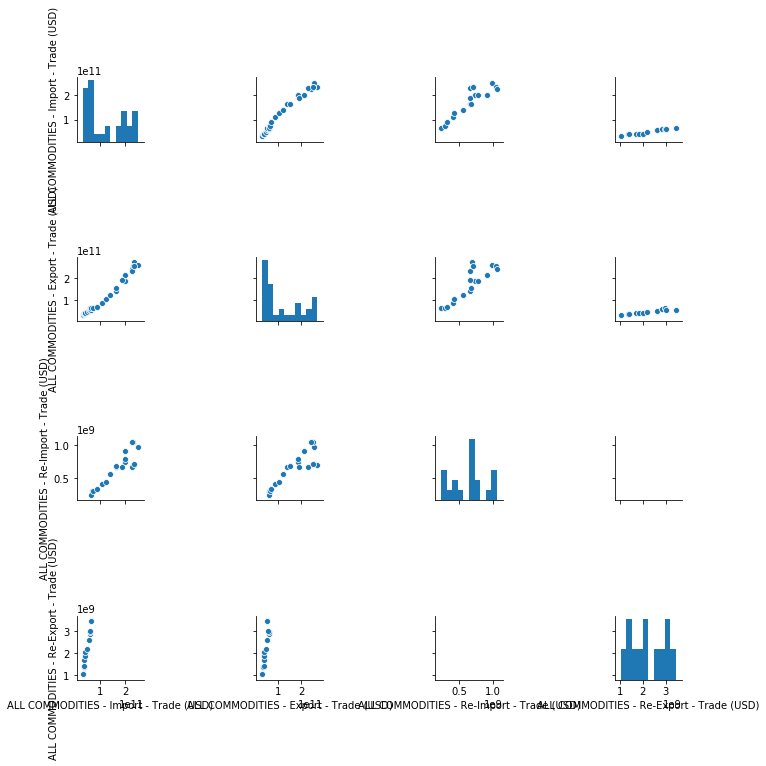

In [10]:
sns.pairplot(commodities)
plt.show()

In [58]:
commodities_corr = currency.corr()

In [59]:
currency_corr

,Bid High,Ask High,Bid Low,Ask Low,Bid Average,Ask Average
Bid High,1.000000,0.999902,0.999715,0.999725,0.999934,0.999930
Ask High,0.999902,1.000000,0.999617,0.999630,0.999835,0.999850
Bid Low,0.999715,0.999617,1.000000,0.999972,0.999895,0.999890
Ask Low,0.999725,0.999630,0.999972,1.000000,0.999903,0.999906
Bid Average,0.999934,0.999835,0.999895,0.999903,1.000000,0.999997
Ask Average,0.999930,0.999850,0.999890,0.999906,0.999997,1.000000


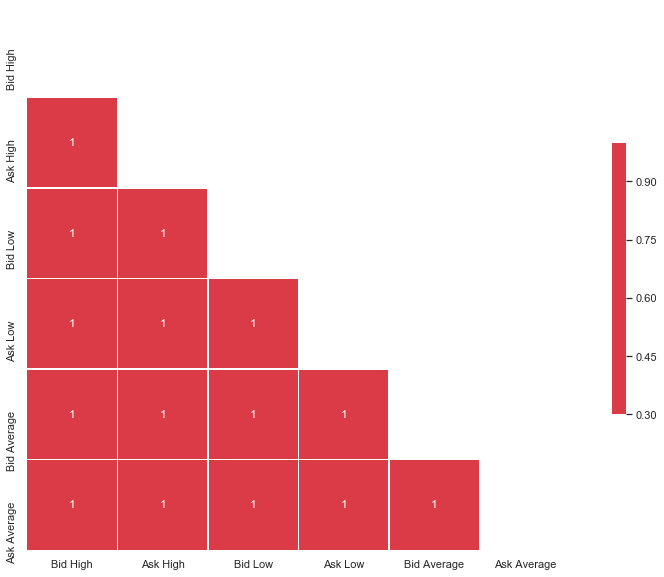

In [60]:
sns.set(style="white")

mask = np.zeros_like(currency_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(currency_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();